In [1]:
import pandas as pd
temperature_data = pd.read_csv("temperature_data.csv")

In [10]:
temperature_data_modified = temperature_data[['timestamp', 'measurementValue']]
temperature_data_modified['timestamp'] = pd.to_datetime(temperature_data_modified['timestamp'])
temperature_data_modified.set_index('timestamp', inplace=True)
temperature_data_modified.head()

C:\Users\nikla\AppData\Local\Temp\ipykernel_13640\3285357612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_data_modified['timestamp'] = pd.to_datetime(temperature_data_modified['timestamp'])


,measurementValue
timestamp,
2022-06-07 10:43:51,22
2022-06-07 10:45:13,22
2022-06-07 10:46:33,22
2022-06-07 10:47:56,22
2022-06-07 10:49:06,22


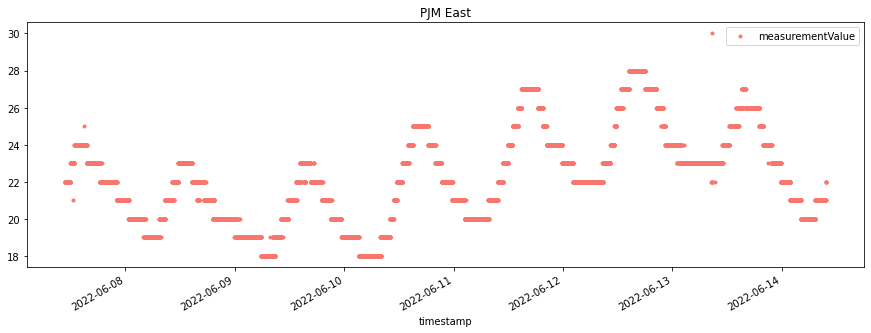

In [11]:
import matplotlib.pyplot as plt
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
temperature_data_modified.plot(style='.', figsize=(15,5), color=color_pal[0], title='PJM East')
plt.show()

In [15]:
temperature_data_modified.groupby([temperature_data.index.day, temperature_data.index.dt.hour]).measurementValue.mean()

AttributeError: 'RangeIndex' object has no attribute 'day'

In [12]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(temperature_data_modified, label='measurementValue')

features_and_target = pd.concat([X, y], axis=1)

C:\Users\nikla\AppData\Local\Temp\ipykernel_13640\1225458179.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [13]:
features_and_target

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,measurementValue
timestamp,,,,,,,,,
2022-06-07 10:43:51,10,1,2,6,2022,158,7,23,22
2022-06-07 10:45:13,10,1,2,6,2022,158,7,23,22
2022-06-07 10:46:33,10,1,2,6,2022,158,7,23,22
2022-06-07 10:47:56,10,1,2,6,2022,158,7,23,22
2022-06-07 10:49:06,10,1,2,6,2022,158,7,23,22
...,...,...,...,...,...,...,...,...,...
2022-06-14 09:37:59,9,1,2,6,2022,165,14,24,21
2022-06-14 09:39:08,9,1,2,6,2022,165,14,24,21
2022-06-14 09:40:20,9,1,2,6,2022,165,14,24,22
